In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os
import math
import torch

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, accuracy_score
from functools import partial, reduce
from scipy.stats import ttest_ind

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Analysis of CLAM C-Kit 11 and C-Kit 8 classification results
* **accuracy**, **confusion-matrix**, **ROC-curves** and **AUC**
* histogram of **model posteriors**
* determine **operating point** on val. set
* determine **confidence** of validation metrics

#### additionally
* correlations in predictions (special features in misclassified samples)
* analyze heatmaps of misclassified samples

In [3]:
exp_list = ['c-kit-8_11-mutation',
            'c-kit-8_11-mutation-clam_mb']

In [4]:
def summary(exp_path):
    summary_csv = pd.read_csv('../results/{}_s1/summary.csv'.format(exp_path))
    # mean val metrics
    print(exp_path)
    print('\n')
    print("Mean val accuracy \033[1m {} \033[0m".format(round(summary_csv['val_acc'].mean(),3)))
    print("Mean val AUC {}".format(round(summary_csv['val_auc'].mean(),3)))
    print("Mean test accuracy \033[1m {} \033[0m".format(round(summary_csv['test_acc'].mean(),3)))
    print("Mean test AUC {}".format(round(summary_csv['test_auc'].mean(),3)))
    print('\n')

In [5]:
for exp_path in exp_list:
    summary(exp_path)

c-kit-8_11-mutation


Mean val accuracy  0.691 
Mean val AUC 0.816
Mean test accuracy  0.664 
Mean test AUC 0.842


c-kit-8_11-mutation-clam_mb


Mean val accuracy  0.675 
Mean val AUC 0.805
Mean test accuracy  0.629 
Mean test AUC 0.757




In [7]:
def print_confusion_matrix(exp_path):
    #
    labels = ['no mutation', 'c-Kit 8', 'c-Kit 11']
    # load evaluation results val. set
    folds = {}
    for fold in range(10):
        folds[fold] = pd.read_csv(f'../eval_results/EVAL_{exp_path}/fold_{fold}.csv')

    data_full = pd.concat(folds.values(), axis=0)
    
    y = np.array([])
    y_hat = np.array([])

    for fold in folds:
        y = np.append(y, folds[fold]['Y'])
        y_hat = np.append(y_hat, folds[fold]['Y_hat'])
        
    # confusion matrix
    cm = confusion_matrix(y, y_hat)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(cmn, annot=True, fmt='.2f', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.ylabel('Ground Truth')
    plt.xlabel('Predicted')
    plt.title('c-kit-8-11 mutation detection')
    plt.show(block=False)

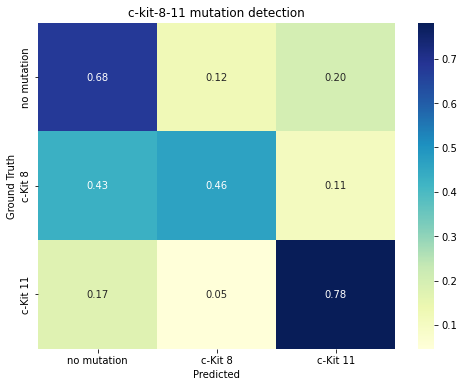

In [8]:
print_confusion_matrix('c-kit-8_11-mutation')

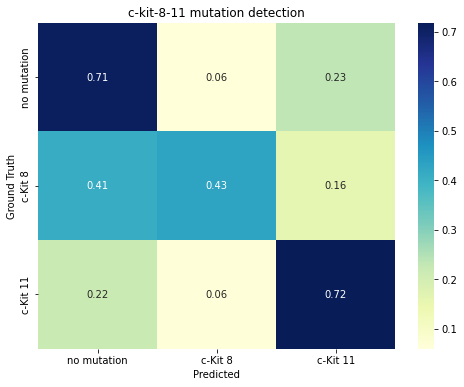

In [10]:
print_confusion_matrix('c-kit-8_11-mutation-clam_mb')